
# PROBLEM DEFINITION
The objective of this project is to analyze the dataset's result of past bank telemarketing campaign and perform machine learning algorithms for predicting valuable customers who will join a term deposit product. The dataset was taken from 2008 to 2013 and it had an imbalance data with the majority of negative result distribution. As the bank's data scientists, we decided to focus on minimizing False Negative Class.

Evaluation metric that we will use is Recall. Where we will minimize false negative class - where we predicted clients that will not open a term deposit, turns out they actually want to open a term deposit. As our objective is to have as many clients to open a term deposit, therefore increasing recall will decrease this type of error.

## Business problem

predictive model which will help the bank marketing team to know which customer will buy the product.


### Classifictaion task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('bank-additional-full edited.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Domain analysis

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this    client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
                   The labor rate variance measures the difference between the                    actual and expected cost of labor. It is calculated as the                      difference between the actual labor rate paid and the                          standard rate, multiplied by the number of actual hours                        worked. 

17 - cons.price.idx: consumer price index - monthly indicator (numeric)
                       an index of the variation in prices for retail goods and                        other items.

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
                    This consumer confidence indicator provides an indication                       of future developments of households’ consumption and                           saving, based upon answers regarding their expected                             financial situation, their sentiment about the general                         economic situation, unemployment and capability of savings.

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)- interest rate

20 - nr.employed: number of employees - quarterly indicator (numeric)
     Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


# Basic checks

In [3]:
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [17]:
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### no constant features
### most customers are married who owns a house and having a university degree
### The most contacted day is Thurday and month May
### job status of most of the customers are admin
### Maximum communication is with the help of cell phone

In [7]:
data.shape

(41188, 21)

In [10]:
#checking null values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### No null values

In [12]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [23]:
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

## Exploratory Data Analysis

### univariate analysis

In [18]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


- Age is a numerical data with a positive skew of 0.785 and 78% distict values   in a range between 17-98

- Job is categorical data with 12 distinct values where 25% of the customers     have job status as admin which is the highest, less than <1 job status are     unknown whereas 22%,16%,10%,7% belongs to blue-collar,technician,services and   management  respectively 

- Marital is a categorical data with 4 distinct values such as                   married,single,divorced and unknown where 61% of the customers are             married,28%,11% are single and divorced respectively and less than 1% are       unknown

- Education:categorical wih 8 distinct values  where 30% of the customers have   university.degree , 23% customer have completed high school. 15%, 13%, 10%,     6% are  basic.9y, professional.course, basic.4y, basic.6y  respectively . 4%   of the customers education is unknown and less than 1% of the customer are     illiterte 

- Default  : Default is a categorical data with 3 distinct values i.e'yes',       'no' and 'unknown' .Where 79% of the data belongs to 'no' category, 21%  data   is 'unknown', whereas less than 1% of the data belongs to 'yes'category.

- Housing :Housing is a categorical data with 3 distinct values i.e 'yes', 'no'   and 'unknown' .Where 52% of the data belongs to 'yes' category, 45%  data       belongs to 'no' category, whereas 2% of data the data is  'unknown'.
 
- Loan : Loan is a categorical data with 3 distinct values i.e  'yes', 'no' and   'unknown' .Where 82% of the data belongs to
  'no'category, 15% to 'yes' catogery and 2% data is in 'unknown' category.

- Contact : Contact is a categorical data with 2 distinct values i.e
  cellular and telephone. 63% of the contact are made by using cellular           category and 37% are done by telephone.
  
- Month : max last contact month is May with 33% of the total values,july has     17% of the data and less than 1% belongs to december

- day_of_week : max last contact day is thursday with 21% data and min is fri     with 19% data

- duration :  duration is a numerical data with a positive skew of 3.26 and 4%   distict values in a range between 0-4918

- Campaign : It is a numerical data with a postive skew of 4.76 with 37.0  of     kurtosis and less 1% of distinct values, in a range between 1 to 56.

- pdays : It is a numerical data with a negative skew of -4.92
  with 22.2 of kurtosis and less 1% of distinct values, in a range between 0 to   999, with 15 zero values

- Previous : It consists of 8 distinct values. Max number of contacts performed   before this campaign and for client are 0 i.e 86%.

- Poutcome : It has 3 distinct values that are nonexistent with 86% of the       data,failure with 10% and success with 3%.

- cons.price.idx : It is a numerical data with a negative skew of -0.231 and     26 distict values   in a range between 92.20-94.77

- cons.conf.idx : It is a numerical data with a positive skew of 0.303 and 26     distict values in a range between -50.8 and -26.9

- euribor3m : It is a numerical data with a negaitve skew of -0.709 and 316       distict values in a range between 0.63-5.04

- nr.employed : It is a numerical data with a negative skew of -1.04 and 11       distict values in a range between 4964-5228

- y : It is the output variable with more than 80% values in 'No' category


### Bivariate analysis

In [25]:
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [28]:
data1=data[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']]
data2=data[['age','duration','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

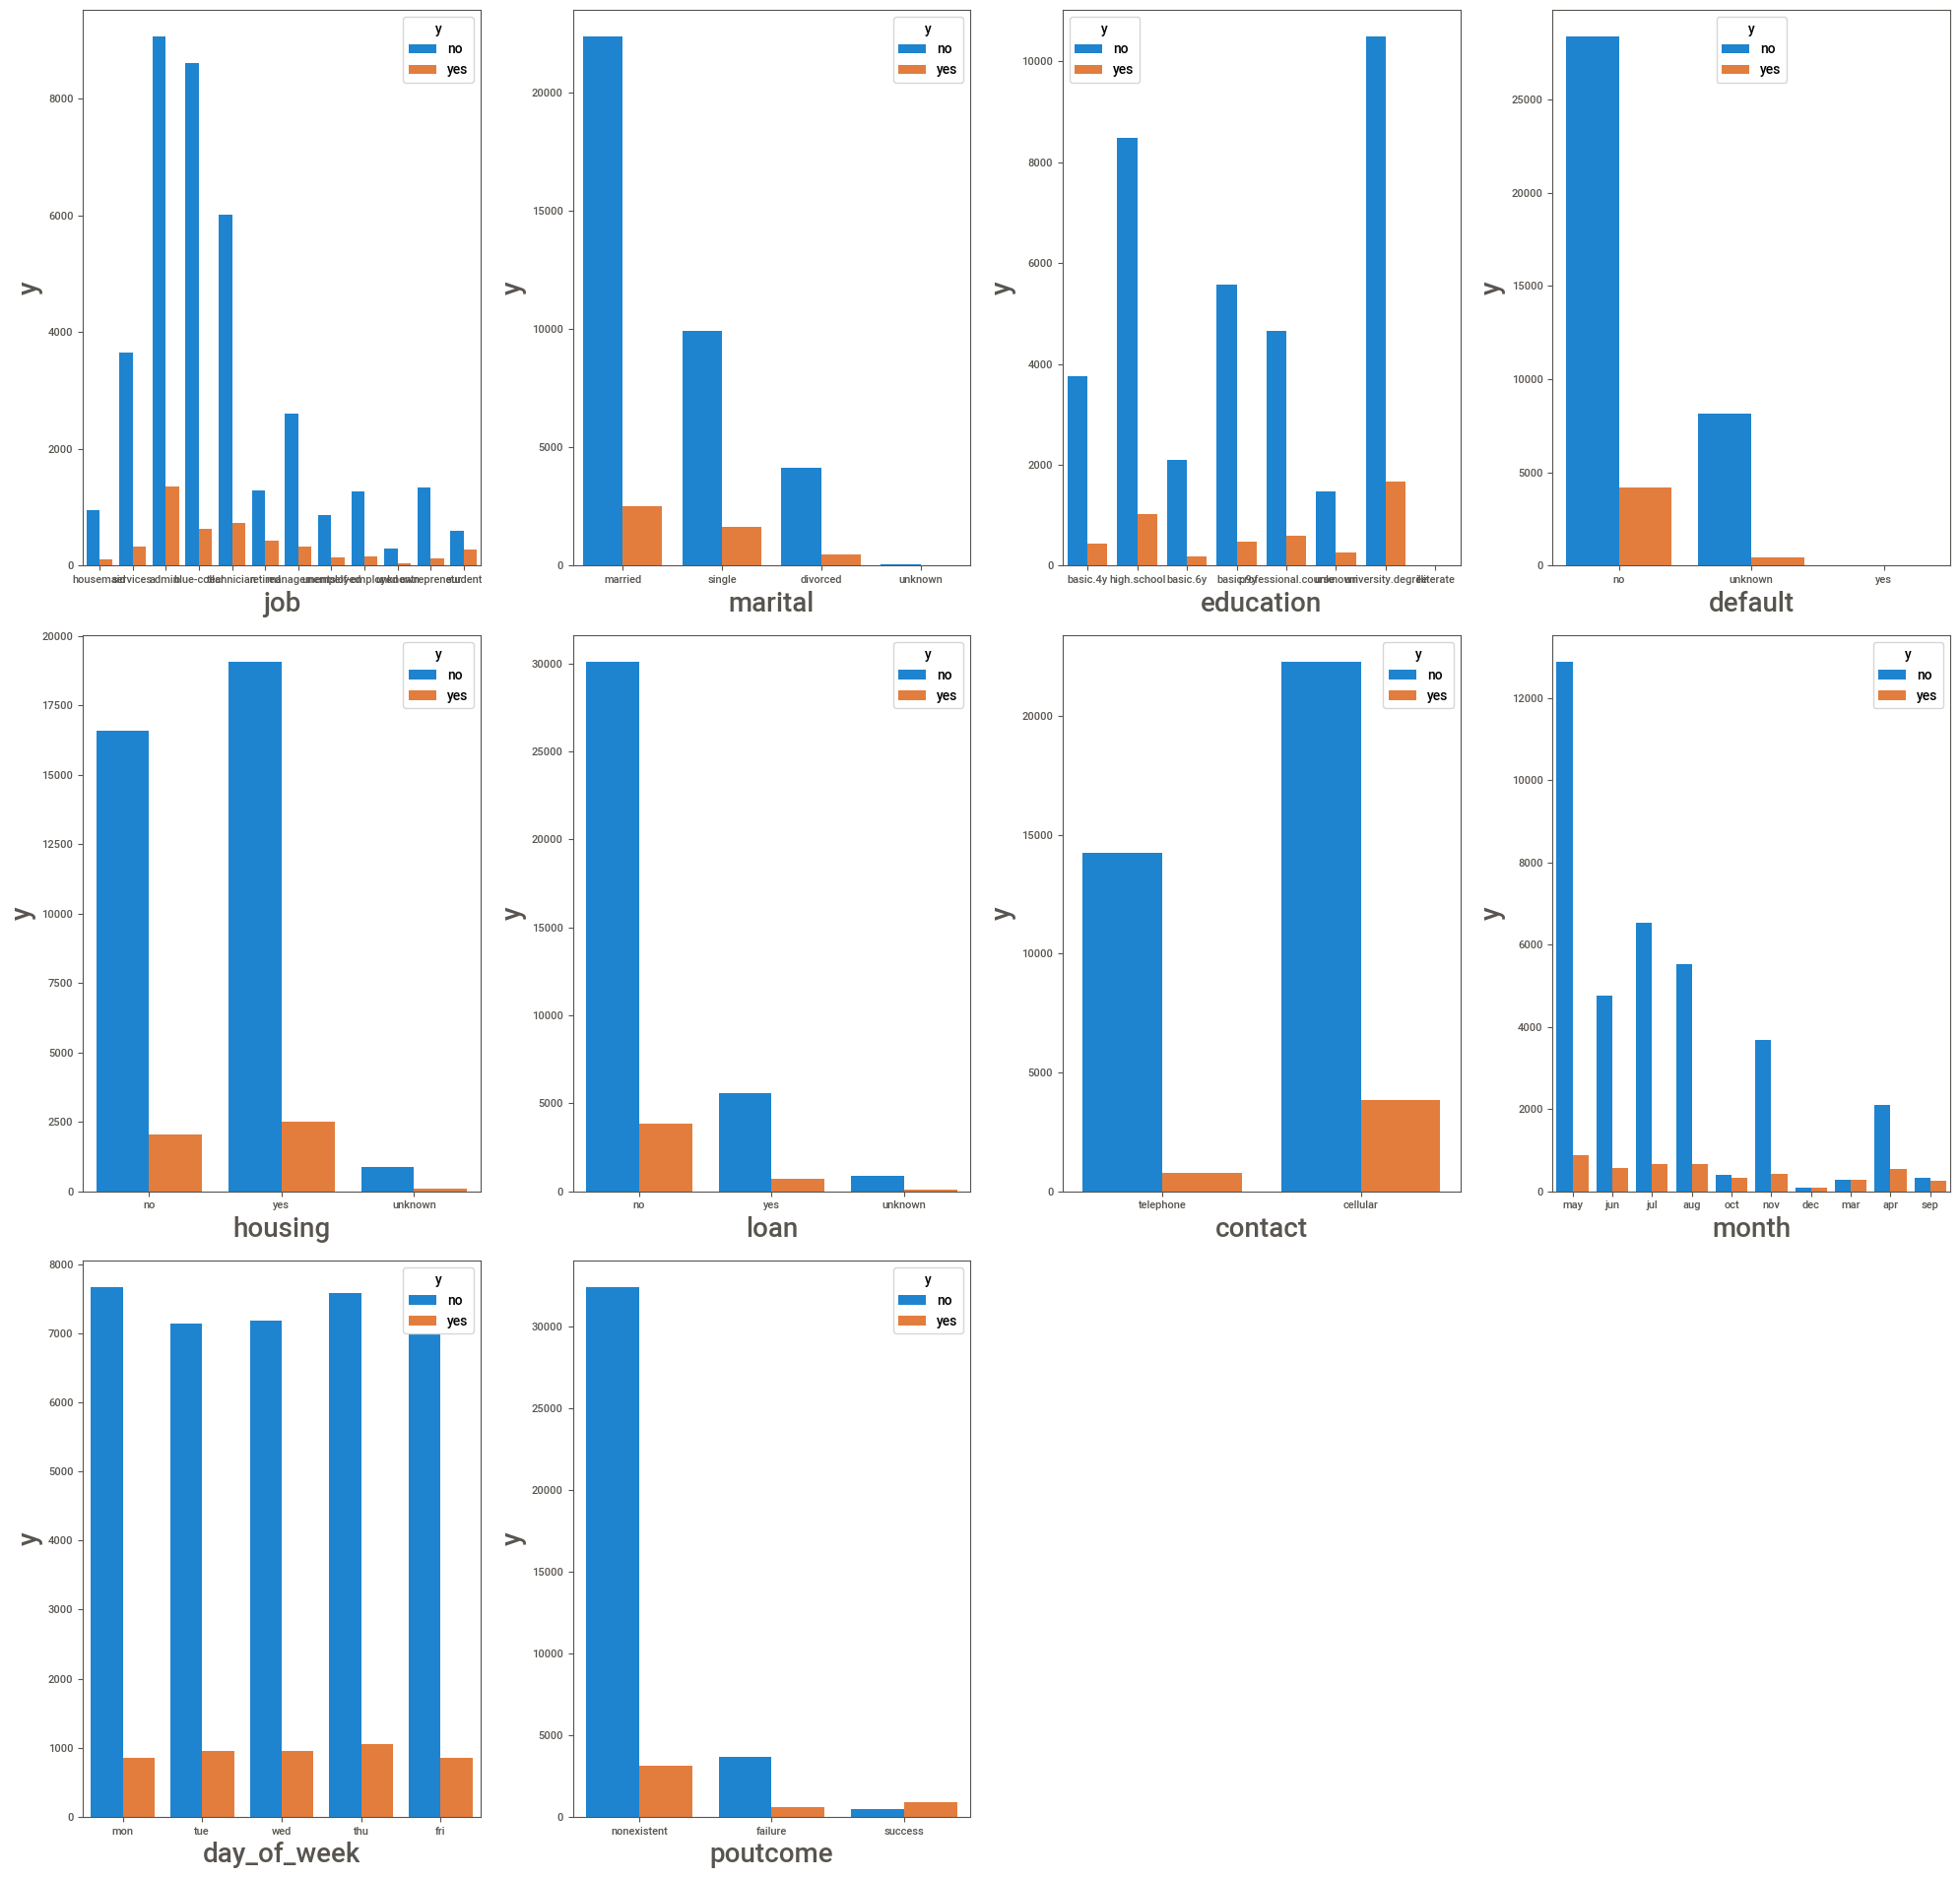

In [29]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1 #counter

for column in data1:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data1[column],hue=data['y'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('y',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

### Bank Clients Conclusion
- There is no direct relationship between the output variable and job,we can also say that our top 3 customers belongs to - administor,blue-collar,technician
- Married people have more chances of buying the product as compared to         unmarried and divorced people
- University degree holders have higher chances of buying the product as         compared to other cateogries
- People having credit in default has more chances of buying the product
- There is no direct relationship between housing and output variable 'y'
- People who don't have a personal loan are more likely to purchase the product
- There is no direct relationship between contact and the output variable 'y'
- Maximum customers who purchased the product was in the month of May followed   by July and August
- There is no direct relationship between day_of_week and output variable 'y'
- If the outcome of the previous marketing campaign is in the category           nonexistent than there are more chances of customers to  buy the product.


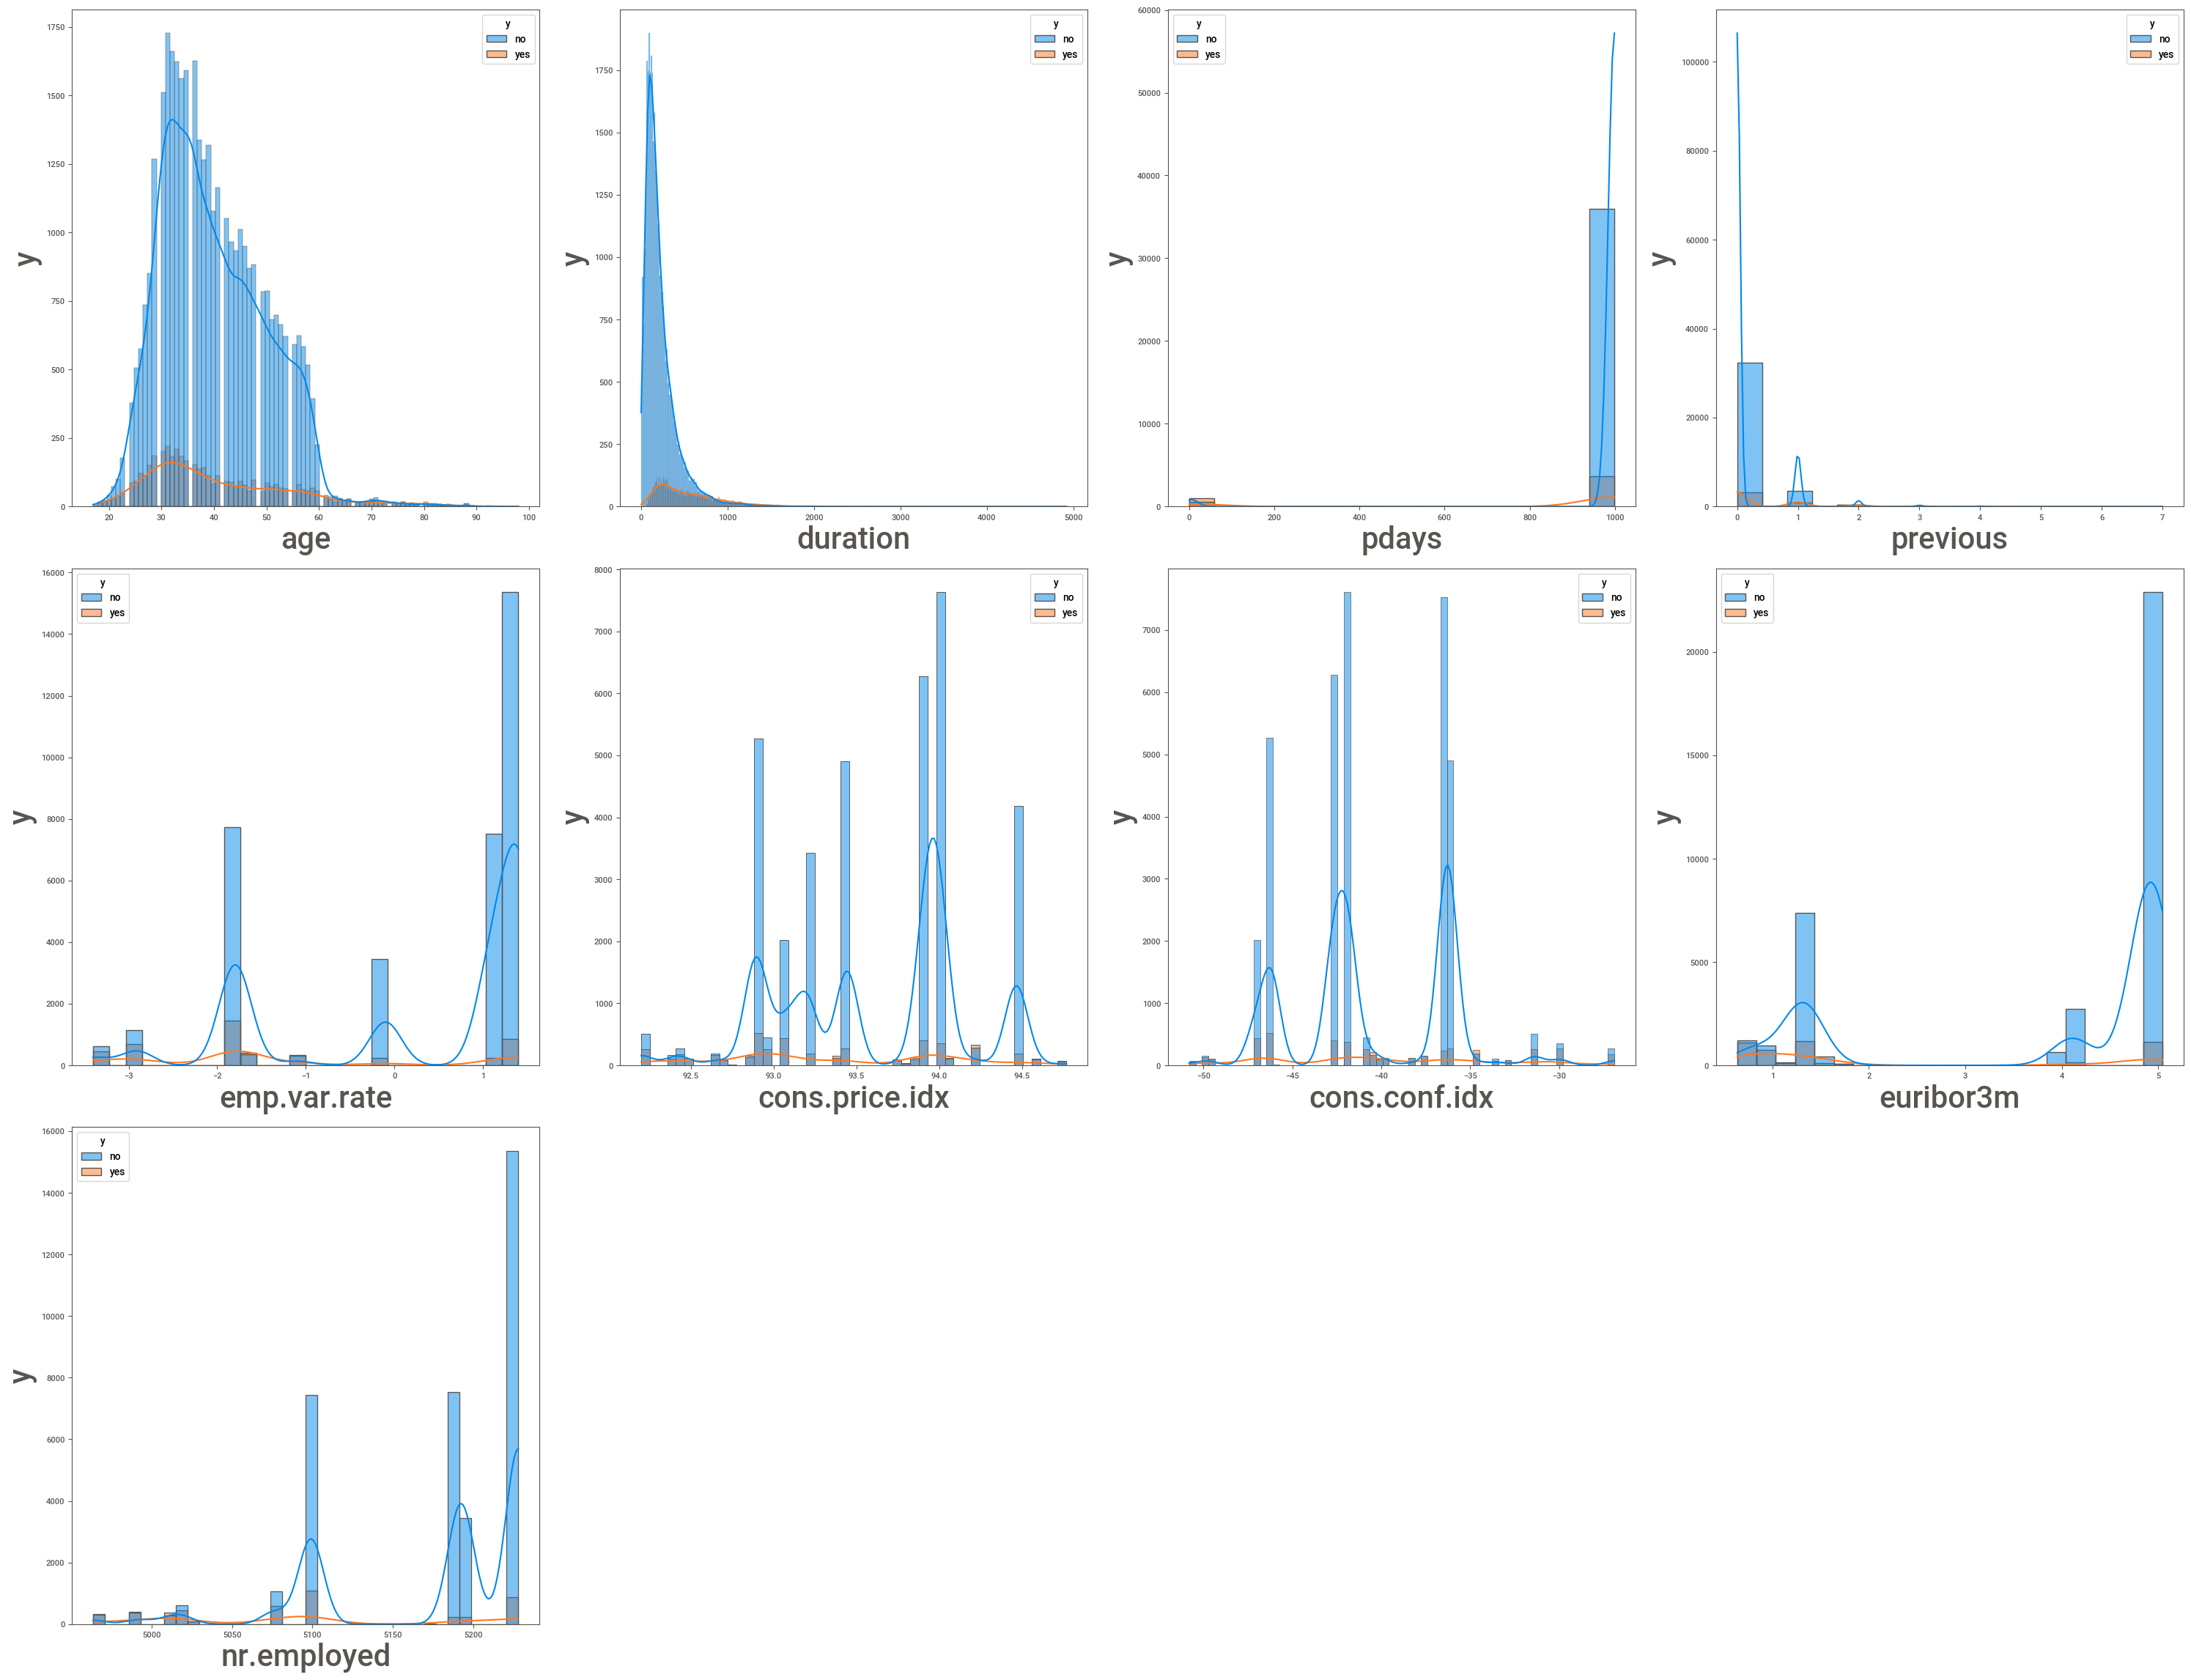

In [32]:
plt.figure(figsize=(30,30), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data2:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data2[column],hue=data['y'],kde=True)
        plt.xlabel(column,fontsize=30)#assign name to x-axis and set font-20
        plt.ylabel('y',fontsize=30)
    plotnumber+=1#counter increment
plt.tight_layout()

- Duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



## Data Preprocessing Pipeline

In [3]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

- no null values

In [4]:
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [5]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [6]:
data.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [7]:
data.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [8]:
data.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [3]:
data['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [9,4,1,2,3, 6, 5,10,8, 12,7,11], inplace=True)

data['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [5,2,6,3,4,7,1,8], inplace=True)

data['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)

data['default'].replace(['yes', 'no', 'unknown'],[3, 1, 2], inplace=True)

data['housing'].replace(['yes', 'no', 'unknown'],[3, 1, 2], inplace=True)

data['loan'].replace(['yes', 'no', 'unknown'],[3, 1, 2], inplace=True)

In [5]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,9,1,5,1,1,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,4,1,2,2,1,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,4,1,2,1,3,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,1,1,6,1,1,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,4,1,2,1,1,3,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,4,1,3,1,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,2,1,4,1,1,1,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,6,1,1,1,3,1,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,3,1,4,1,1,1,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
data.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [7]:
data.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [8]:
data.month=data.month.map({'may':1,'jul':2,'aug':3,'jun':4,'nov':5,'apr':6,'oct':7,'sep':8,'mar':9,'dec':10})
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,9,1,5,1,1,1,telephone,1,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,4,1,2,2,1,1,telephone,1,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,4,1,2,1,3,1,telephone,1,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,1,1,6,1,1,1,telephone,1,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,4,1,2,1,1,3,telephone,1,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,4,1,3,1,cellular,5,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,2,1,4,1,1,1,cellular,5,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,6,1,1,1,3,1,cellular,5,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,3,1,4,1,1,1,cellular,5,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
data=pd.get_dummies(data = data, prefix = ['contact'] , columns = ['contact'] , drop_first = True)

In [10]:
data

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone
0,56,9,1,5,1,1,1,1,mon,261,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,4,1,2,2,1,1,1,mon,149,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,4,1,2,1,3,1,1,mon,226,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,1,1,6,1,1,1,1,mon,151,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,4,1,2,1,1,3,1,mon,307,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,4,1,3,1,5,fri,334,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0
41184,46,2,1,4,1,1,1,5,fri,383,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,6,1,1,1,3,1,5,fri,189,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,3,1,4,1,1,1,5,fri,442,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0


In [11]:
data.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [12]:
data.day_of_week=data.day_of_week.map({'thu':1,'mon':2,'wed':3,'tue':4,'fri':5})
data

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone
0,56,9,1,5,1,1,1,1,2,261,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,4,1,2,2,1,1,1,2,149,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,4,1,2,1,3,1,1,2,226,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,1,1,6,1,1,1,1,2,151,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,4,1,2,1,1,3,1,2,307,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,4,1,3,1,5,5,334,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0
41184,46,2,1,4,1,1,1,5,5,383,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,6,1,1,1,3,1,5,5,189,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,3,1,4,1,1,1,5,5,442,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0


In [13]:
data.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [14]:
data['poutcome'].replace(['nonexistent','failure','success'],[1, 2,3], inplace=True)

In [15]:
data

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone
0,56,9,1,5,1,1,1,1,2,261,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,4,1,2,2,1,1,1,2,149,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,4,1,2,1,3,1,1,2,226,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,1,1,6,1,1,1,1,2,151,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,4,1,2,1,1,3,1,2,307,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,4,1,3,1,5,5,334,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes,0
41184,46,2,1,4,1,1,1,5,5,383,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,6,1,1,1,3,1,5,5,189,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,3,1,4,1,1,1,5,5,442,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes,0


In [16]:
data.y=data.y.map({'yes':1,'no':0})
data

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone
0,56,9,1,5,1,1,1,1,2,261,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
1,57,4,1,2,2,1,1,1,2,149,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
2,37,4,1,2,1,3,1,1,2,226,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
3,40,1,1,6,1,1,1,1,2,151,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
4,56,4,1,2,1,1,3,1,2,307,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,4,1,3,1,5,5,334,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,0
41184,46,2,1,4,1,1,1,5,5,383,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,0
41185,56,6,1,1,1,3,1,5,5,189,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,0
41186,44,3,1,4,1,1,1,5,5,442,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   job                41188 non-null  int64  
 2   marital            41188 non-null  int64  
 3   education          41188 non-null  int64  
 4   default            41188 non-null  int64  
 5   housing            41188 non-null  int64  
 6   loan               41188 non-null  int64  
 7   month              41188 non-null  int64  
 8   day_of_week        41188 non-null  int64  
 9   duration           41188 non-null  int64  
 10  campaign           41188 non-null  int64  
 11  pdays              41188 non-null  int64  
 12  previous           41188 non-null  int64  
 13  poutcome           41188 non-null  int64  
 14  emp.var.rate       41188 non-null  float64
 15  cons.price.idx     41188 non-null  float64
 16  cons.conf.idx      411

### checking outliers

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

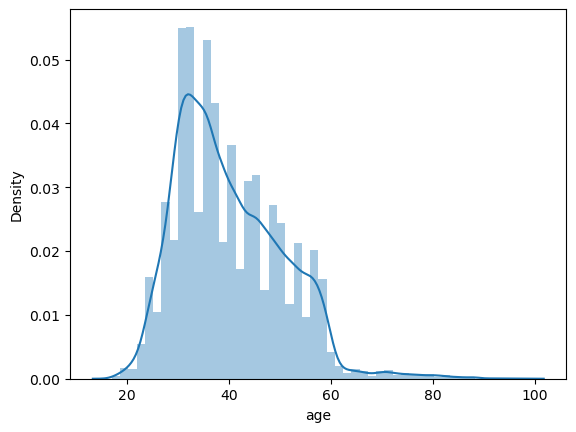

In [17]:
sns.distplot(data.age)

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

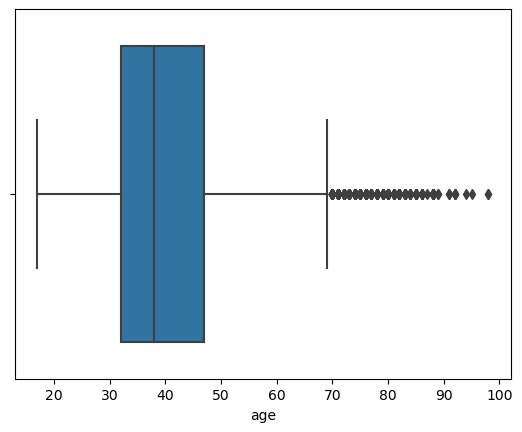

In [18]:
sns.boxplot(data.age)  # outliers in max limit

In [19]:
from scipy import stats

IQR=stats.iqr(data.age,interpolation='midpoint')
IQR

15.0

In [20]:
Q1=data.age.quantile(0.25)
Q3=data.age.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [21]:
max_limit= Q3+1.5*IQR
max_limit

69.5

In [22]:
data.loc[data['age']<min_limit]
data.loc[data['age']>max_limit]

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone
27713,70,6,3,5,1,3,1,9,2,187,...,999,0,1,-1.8,92.843,-50.0,1.811,5099.1,1,0
27757,76,6,1,1,1,1,3,9,1,167,...,999,0,1,-1.8,92.843,-50.0,1.757,5099.1,0,0
27780,73,6,1,1,1,3,1,9,4,179,...,999,1,2,-1.8,92.843,-50.0,1.687,5099.1,0,0
27800,88,6,3,5,1,3,1,9,3,48,...,999,0,1,-1.8,92.843,-50.0,1.663,5099.1,0,0
27802,88,6,3,5,1,1,1,9,3,266,...,999,0,1,-1.8,92.843,-50.0,1.663,5099.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,6,3,5,2,3,3,7,2,138,...,3,1,3,-1.1,94.601,-49.5,1.000,4963.6,0,0
40996,81,6,1,5,1,3,1,7,3,621,...,999,2,2,-1.1,94.601,-49.5,1.016,4963.6,1,0
41004,80,6,1,4,1,3,1,7,1,411,...,999,1,2,-1.1,94.601,-49.5,1.025,4963.6,1,0
41183,73,6,1,4,1,3,1,5,5,334,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,0


In [23]:
data.loc[data['age']>max_limit]

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone
27713,70,6,3,5,1,3,1,9,2,187,...,999,0,1,-1.8,92.843,-50.0,1.811,5099.1,1,0
27757,76,6,1,1,1,1,3,9,1,167,...,999,0,1,-1.8,92.843,-50.0,1.757,5099.1,0,0
27780,73,6,1,1,1,3,1,9,4,179,...,999,1,2,-1.8,92.843,-50.0,1.687,5099.1,0,0
27800,88,6,3,5,1,3,1,9,3,48,...,999,0,1,-1.8,92.843,-50.0,1.663,5099.1,0,0
27802,88,6,3,5,1,1,1,9,3,266,...,999,0,1,-1.8,92.843,-50.0,1.663,5099.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,6,3,5,2,3,3,7,2,138,...,3,1,3,-1.1,94.601,-49.5,1.000,4963.6,0,0
40996,81,6,1,5,1,3,1,7,3,621,...,999,2,2,-1.1,94.601,-49.5,1.016,4963.6,1,0
41004,80,6,1,4,1,3,1,7,1,411,...,999,1,2,-1.1,94.601,-49.5,1.025,4963.6,1,0
41183,73,6,1,4,1,3,1,5,5,334,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,0


In [24]:
len(data.loc[data['age']>max_limit])

469

In [25]:
data.shape

(41188, 21)

In [26]:
data.shape[0]
len(data.loc[data['age']>max_limit]) 
469/41188*100                      # as there are less than 5% outliers 
                                   #we'll handle

1.1386811692726035

In [27]:
data.loc[data['age']>max_limit,'age']=np.median(data.age)

In [28]:
data.age.value_counts()

31    1947
38    1876
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
55     648
57     646
25     598
58     576
24     463
59     463
60     283
23     226
22     137
21     102
61      73
20      65
62      62
66      57
64      57
63      55
65      44
19      42
69      34
68      33
18      28
67      26
17       5
Name: age, dtype: int64

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

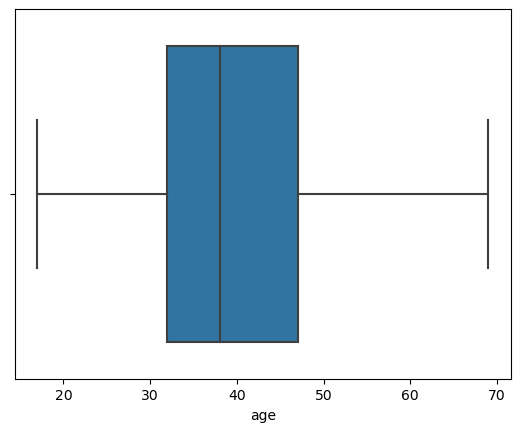

In [29]:
sns.boxplot(data.age)

## duration

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

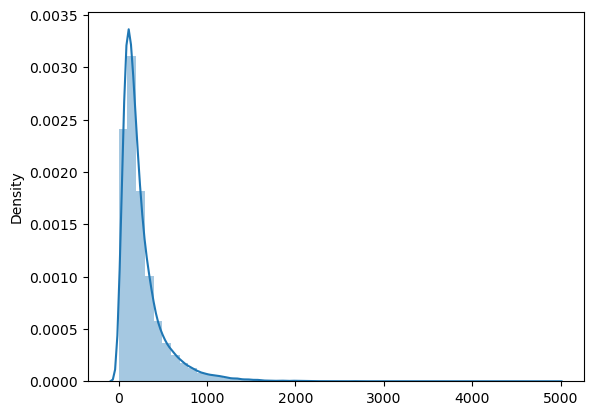

In [30]:
sns.distplot(x=data.duration)

<AxesSubplot:xlabel='duration'>

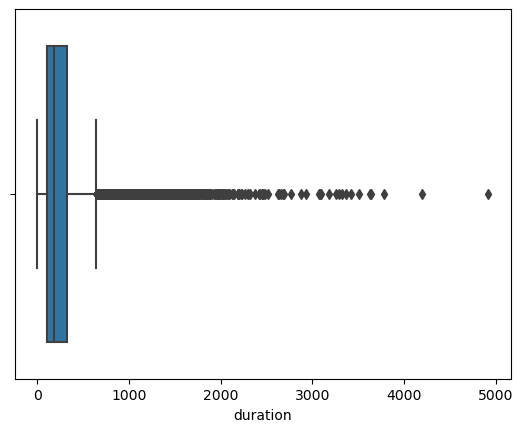

In [31]:
sns.boxplot(x=data.duration)

In [32]:
IQR=stats.iqr(data.duration,interpolation='midpoint')
IQR

217.0

In [33]:
Q1=data.job.quantile(0.25)
Q3=data.job.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [34]:
min_limit

-324.5

In [35]:
max_limit

330.5

In [36]:
data.loc[data['duration']<min_limit]
data.loc[data['duration']>max_limit]

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone
8,24,3,2,4,1,3,1,1,2,380,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
17,46,2,1,6,2,3,3,1,2,440,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
18,50,2,1,3,1,3,3,1,2,353,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
22,55,6,2,2,1,3,1,1,2,342,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
29,55,12,1,1,2,2,2,1,2,362,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41176,38,9,3,2,1,3,3,5,1,360,...,999,0,1,-1.1,94.767,-50.8,1.031,4963.6,0,0
41178,62,6,1,1,1,1,1,5,1,483,...,6,3,3,-1.1,94.767,-50.8,1.031,4963.6,1,0
41183,38,6,1,4,1,3,1,5,5,334,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,0
41184,46,2,1,4,1,1,1,5,5,383,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,0


In [40]:
data.loc[data['duration']<min_limit]

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone


In [41]:
len(data.loc[data['duration']>max_limit])

9776

In [42]:
data.shape[0]
len(data.loc[data['duration']>max_limit]) 
9776/41188*100 

23.735068466543655

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   job                41188 non-null  int64  
 2   marital            41188 non-null  int64  
 3   education          41188 non-null  int64  
 4   default            41188 non-null  int64  
 5   housing            41188 non-null  int64  
 6   loan               41188 non-null  int64  
 7   month              41188 non-null  int64  
 8   day_of_week        41188 non-null  int64  
 9   duration           41188 non-null  int64  
 10  campaign           41188 non-null  int64  
 11  pdays              41188 non-null  int64  
 12  previous           41188 non-null  int64  
 13  poutcome           41188 non-null  int64  
 14  emp.var.rate       41188 non-null  float64
 15  cons.price.idx     41188 non-null  float64
 16  cons.conf.idx      411

## campaign

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

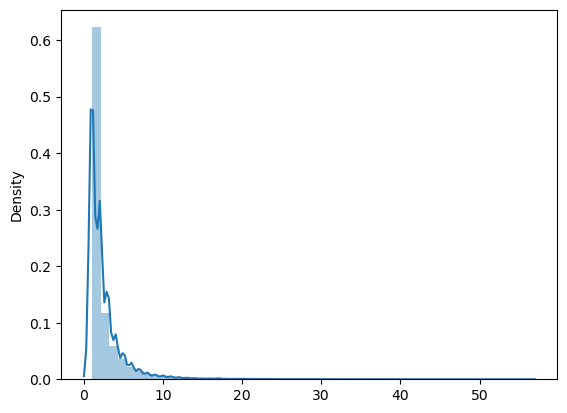

In [43]:
sns.distplot(x=data.campaign)

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

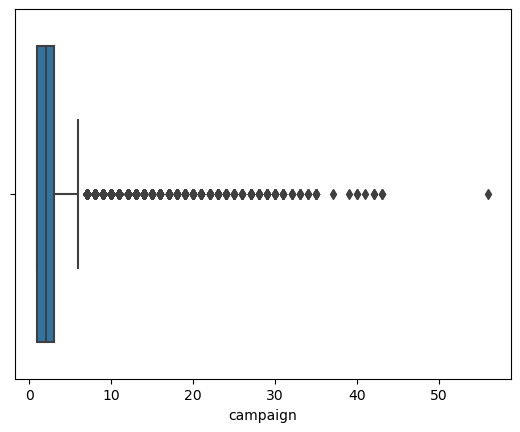

In [44]:
sns.boxplot(data.campaign)

In [45]:
IQR=stats.iqr(data.campaign,interpolation='midpoint')
IQR

2.0

In [46]:
Q1=data.marital.quantile(0.25)
Q3=data.marital.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [47]:
data.loc[data['campaign']<min_limit]
data.loc[data['campaign']>max_limit]

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone
694,53,1,1,1,2,3,1,1,4,13,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
786,38,2,1,3,1,3,1,1,3,275,...,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0,1
827,30,4,1,1,1,3,1,1,3,425,...,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0,1
887,54,1,1,1,1,1,1,1,3,388,...,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0,1
890,38,4,2,7,2,3,1,1,3,256,...,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40698,29,3,2,4,1,3,1,8,2,157,...,3,5,3,-1.1,94.199,-37.5,0.879,4963.6,0,0
40821,33,3,2,4,1,3,1,8,5,246,...,999,2,2,-1.1,94.199,-37.5,0.879,4963.6,0,0
40956,54,8,1,1,1,3,1,7,1,317,...,6,1,3,-1.1,94.601,-49.5,0.987,4963.6,0,0
40993,50,7,3,1,1,3,1,7,4,898,...,11,2,3,-1.1,94.601,-49.5,1.008,4963.6,1,1


In [49]:
data.loc[data['campaign']<min_limit]

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone


In [48]:
len(data.loc[data['campaign']>max_limit])

3385

In [50]:
data.shape[0]
len(data.loc[data['campaign']>max_limit])
3385/41188*100 

8.218413130037876

In [51]:
data.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [52]:
data.duplicated().sum()

12

In [53]:
data.drop_duplicates(keep='first',inplace=True) #to remove duplicates

In [54]:
data.duplicated().sum()

0

In [55]:
data.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone
0,56,9,1,5,1,1,1,1,2,261,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
1,57,4,1,2,2,1,1,1,2,149,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
2,37,4,1,2,1,3,1,1,2,226,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
3,40,1,1,6,1,1,1,1,2,151,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
4,56,4,1,2,1,1,3,1,2,307,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1


In [81]:
data.drop(columns=['pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],inplace=True)

Since pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m and nr.employed consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.

In [82]:
data.to_csv('preprocessed_data.csv')

In [2]:
data1=pd.read_csv('preprocessed_data.csv')

In [3]:
data1

,Unnamed: 0,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,poutcome,y,contact_telephone
0,0,56,9,1,5,1,1,1,1,2,261,1,1,0,1
1,1,57,4,1,2,2,1,1,1,2,149,1,1,0,1
2,2,37,4,1,2,1,3,1,1,2,226,1,1,0,1
3,3,40,1,1,6,1,1,1,1,2,151,1,1,0,1
4,4,56,4,1,2,1,1,3,1,2,307,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,41183,38,6,1,4,1,3,1,5,5,334,1,1,1,0
41172,41184,46,2,1,4,1,1,1,5,5,383,1,1,0,0
41173,41185,56,6,1,1,1,3,1,5,5,189,2,1,0,0
41174,41186,44,3,1,4,1,1,1,5,5,442,1,1,1,0


## Separating independent and dependent variables

In [3]:
X=data1.drop(['Unnamed: 0','y'], axis=1)
y=data1.y

In [4]:
X

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,poutcome,contact_telephone
0,56,9,1,5,1,1,1,1,2,261,1,1,1
1,57,4,1,2,2,1,1,1,2,149,1,1,1
2,37,4,1,2,1,3,1,1,2,226,1,1,1
3,40,1,1,6,1,1,1,1,2,151,1,1,1
4,56,4,1,2,1,1,3,1,2,307,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,38,6,1,4,1,3,1,5,5,334,1,1,0
41172,46,2,1,4,1,1,1,5,5,383,1,1,0
41173,56,6,1,1,1,3,1,5,5,189,2,1,0
41174,44,3,1,4,1,1,1,5,5,442,1,1,0


In [5]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41171    1
41172    0
41173    0
41174    1
41175    0
Name: y, Length: 41176, dtype: int64

## Handling imbalanced dataset

Since the class distribution in the target variable is ~89:11 indicating an imbalance dataset, we need to resample it.

In [4]:
## Balacing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print(Counter(y))# checking count for each class 
X_sm,y_sm=sm.fit_resample(X,y)#applying sampling on target variable 
print(Counter(y_sm))# checking count after sampling for  each class

Counter({0: 36537, 1: 4639})
Counter({0: 36537, 1: 36537})


## Feature Selection

<AxesSubplot:>

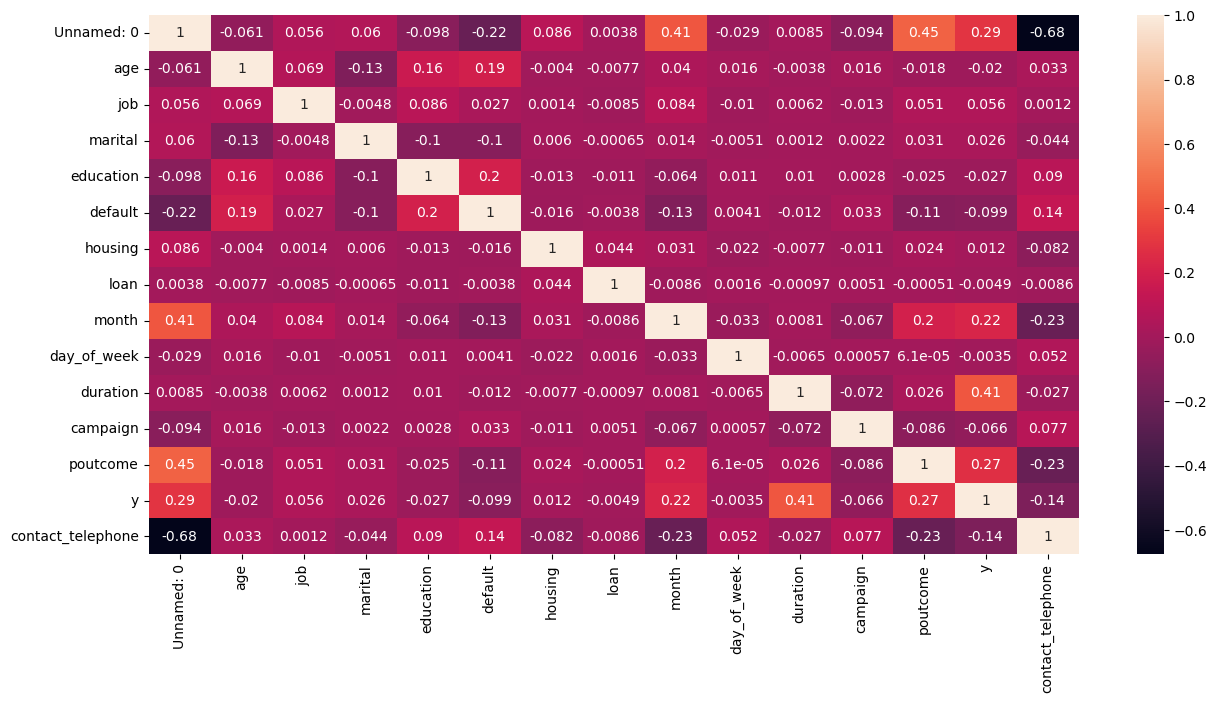

In [7]:
plt.figure(figsize=(15,7))
sns.heatmap(data1.corr(), annot=True)

There are no features that are highly correlated and inversely correlated. If we had, we could have written the condition that if the correlation is higher than 0.8 (or can be any threshold value depending on the domain knowledge) and less than -0.8, we could have drop those features. Because those correlated features would have been doing the same job.

In [8]:
data1

,Unnamed: 0,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,poutcome,y,contact_telephone
0,0,56,9,1,5,1,1,1,1,2,261,1,1,0,1
1,1,57,4,1,2,2,1,1,1,2,149,1,1,0,1
2,2,37,4,1,2,1,3,1,1,2,226,1,1,0,1
3,3,40,1,1,6,1,1,1,1,2,151,1,1,0,1
4,4,56,4,1,2,1,1,3,1,2,307,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,41183,38,6,1,4,1,3,1,5,5,334,1,1,1,0
41172,41184,46,2,1,4,1,1,1,5,5,383,1,1,0,0
41173,41185,56,6,1,1,1,3,1,5,5,189,2,1,0,0
41174,41186,44,3,1,4,1,1,1,5,5,442,1,1,1,0


## Model creation

In [5]:
## scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()           ## object creation
X_scaled = scalar.fit_transform(X)  # scaling independent variables #we can use minmax scalar,then we will get norminal distribuon data here we are getting standardized data.
#scaling is done by c score by means od finding the difference from mean
#in standaradized data mean will be always one and standard deviation will be zero.

In [6]:
X_scaled

array([[ 1.70647313,  2.03011262, -0.73284752, ..., -0.56596326,
        -0.37286389,  1.31817447],
       [ 1.8104073 ,  0.17926799, -0.73284752, ..., -0.56596326,
        -0.37286389,  1.31817447],
       [-0.26827617,  0.17926799, -0.73284752, ..., -0.56596326,
        -0.37286389,  1.31817447],
       ...,
       [ 1.70647313,  0.91960584, -0.73284752, ..., -0.20498953,
        -0.37286389, -0.75862492],
       [ 0.45926304, -0.19090094, -0.73284752, ..., -0.56596326,
        -0.37286389, -0.75862492],
       [-0.164342  ,  0.91960584, -0.73284752, ...,  0.1559842 ,
         1.82105487, -0.75862492]])

In [7]:
## preparing training and testing data
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=45)

## Linear regression

In [12]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train) 

C:\Users\sahir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_train_pred=clf.predict(X_train) # prediciting y_train

In [14]:
## Step 4 Prediction
y_pred=clf.predict(X_test)  #predicting y_test

In [15]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [18]:
y_pred.shape  # to know the shape of y_pred (rows and columns )

(18269,)

## Evaluation of model

In [20]:
pd.crosstab(y_pred,y_test)

y,0,1
row_0,,
0,7520,1336
1,1651,7762


In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [21]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[7520 1336]
 [1651 7762]]


In [22]:
recall=recall_score(y_test,y_pred)
recall

0.8531545394592218

In [23]:
precision=precision_score(y_test,y_pred)
precision

0.824604270689472

In [24]:
f1score=f1_score(y_test,y_pred)
f1score

0.8386364864134839

In [25]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      9171
           1       0.82      0.85      0.84      9098

    accuracy                           0.84     18269
   macro avg       0.84      0.84      0.84     18269
weighted avg       0.84      0.84      0.84     18269



In [27]:
## Training score
LR_y_train_predict=clf.predict(X_train)
LR_y_train_predict

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [28]:
ac_train=accuracy_score(y_train,LR_y_train_predict)
ac_train

0.8363470486269501

In [29]:
## testing score

LR_y_predict=clf.predict(X_test)
LR_y_predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [30]:
ac_train=accuracy_score(y_test,LR_y_predict)
ac_train

0.8364989873556298

Initially we did scaling of the data and then created the dependent and independent varibles which reulted in very bad scores also we didnot drop pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m and nr.employed

later on we dropped the features as they were not much related to the o/p variable and then we first created X and y variables and then did the scaling which improved our scales a lot


## hyperparameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [32]:
from sklearn.model_selection import StratifiedKFold

In [33]:
# selecting the classifier
log_reg= LogisticRegression()

# selecting hyperparameter tuning
log_param= {"C": 10.0**np.arange(-2,3), "penalty": ["l1", "l2"]}

# defining stratified Kfold cross validation
cv_log= StratifiedKFold(n_splits=5)

# using gridsearch for respective parameters
gridsearch_log= GridSearchCV(log_reg, log_param, cv=cv_log, scoring= "f1_macro", n_jobs=-1, verbose=2)

# fitting the model on resampled data
gridsearch_log.fit(X_train, y_train)

# printing best score and best parameters
print("best score is:" ,gridsearch_log.best_score_)
print("best parameters are:" ,gridsearch_log.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sahir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

best score is: 0.8388517561017744
best parameters are: {'C': 1.0, 'penalty': 'l2'}


C:\Users\sahir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[7520 1651]
 [1336 7762]]
0.8364989873556298
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      9171
           1       0.82      0.85      0.84      9098

    accuracy                           0.84     18269
   macro avg       0.84      0.84      0.84     18269
weighted avg       0.84      0.84      0.84     18269



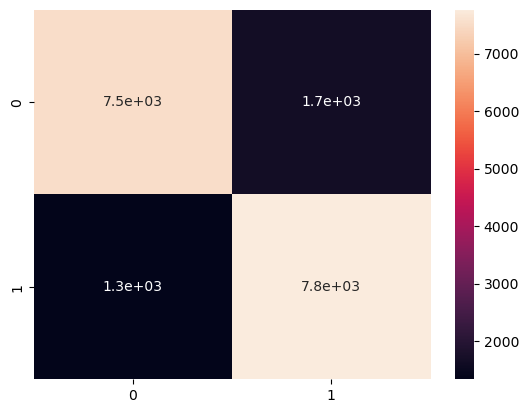

In [34]:
# checking model performance
y_predicted= gridsearch_log.predict(X_test)

cm= confusion_matrix(y_test, y_predicted)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

#### There is not a big difference in the scores after Hyperparameter tuning with an accuracy and recall score of 83% and 85% respectively

## KNN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN
KNN1=KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto',leaf_size=35,n_jobs=1) ## model object creation
KNN1.fit(X_train,y_train)  ## fitting the model
y_hat_knn=KNN1.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score  

In [12]:
y_predict_knn_train=KNN1.predict(X_train)

In [13]:
acc_knn=accuracy_score(y_train,y_predict_knn_train)
acc_knn

0.9999817534896451

In [14]:
print(classification_report(y_train,y_predict_knn_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27366
           1       1.00      1.00      1.00     27439

    accuracy                           1.00     54805
   macro avg       1.00      1.00      1.00     54805
weighted avg       1.00      1.00      1.00     54805



In [15]:
acc_knn=accuracy_score(y_test,y_hat_knn)

In [16]:
acc_knn

0.8885543817395588

In [17]:
from sklearn.metrics import f1_score 
f1_knn=f1_score(y_test,y_hat_knn)#checking model performance 
f1_knn

0.8988875645609853

In [18]:
from sklearn.metrics import recall_score
recall_knn=recall_score(y_test,y_hat_knn)
recall_knn

0.9947241151901517

In [19]:
from sklearn.metrics import precision_score
precision_knn=precision_score(y_test,y_hat_knn)
precision_knn

0.8198949084979162

In [20]:
print(classification_report(y_test,y_hat_knn))

              precision    recall  f1-score   support

           0       0.99      0.78      0.88      9171
           1       0.82      0.99      0.90      9098

    accuracy                           0.89     18269
   macro avg       0.91      0.89      0.89     18269
weighted avg       0.91      0.89      0.89     18269



#### KNN can also be a good model with an accuracy and recall acore of 88% and 99% respectively

## SVM

In [8]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_train, y_train)

SVC()

In [9]:
y_hat1=svclassifier.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat1)
acc

0.7630412173627457

In [11]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      9171
           1       0.76      0.77      0.76      9098

    accuracy                           0.76     18269
   macro avg       0.76      0.76      0.76     18269
weighted avg       0.76      0.76      0.76     18269



In [12]:
cm1=pd.crosstab(y_test,y_hat1)
cm1

col_0,0,1
y,,
0,6944,2227
1,2102,6996


In [13]:
f1=f1_score(y_test,y_hat1) #f1_score
f1

0.7637137710823644

In [14]:
acc=accuracy_score(y_test,y_hat1)
acc

0.7630412173627457

In [15]:
recall=recall_score(y_test,y_hat1)
recall

0.7689602110353924

In [16]:
precision=precision_score(y_test,y_hat1)
precision

0.7585384365174022

In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=4,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.01368691 0.2969261  0.09359251 0.10814708]
Cross validation Score: 0.12808815000139565
Std : 0.10390078246653923


## Hyperparameter tuning

In [18]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1,0.2,0.3,0.4],   ## 0.1,0.2,0.3,04,0.5
              'gamma': [0.001,0.002,0.003], ## 1,2,3,4,5  # lower values as higher gamma values will lead to overfitting
             'random_state':(list(range(1, 20)))} 
model=SVC()  # create empty model that is model on default parameters
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)
  # refit = fit all the parameters verbose= shows 
# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 228 candidates, totalling 1140 fits
[CV] END .................C=0.1, gamma=0.001, random_state=1; total time=  41.5s
[CV] END .................C=0.1, gamma=0.001, random_state=1; total time=  39.6s
[CV] END .................C=0.1, gamma=0.001, random_state=1; total time=  41.9s
[CV] END .................C=0.1, gamma=0.001, random_state=1; total time=  41.1s
[CV] END .................C=0.1, gamma=0.001, random_state=1; total time=  41.0s
[CV] END .................C=0.1, gamma=0.001, random_state=2; total time=  45.9s
[CV] END .................C=0.1, gamma=0.001, random_state=2; total time=  38.1s
[CV] END .................C=0.1, gamma=0.001, random_state=2; total time=  36.8s
[CV] END .................C=0.1, gamma=0.001, random_state=2; total time=  35.9s
[CV] END .................C=0.1, gamma=0.001, random_state=2; total time=  35.1s
[CV] END .................C=0.1, gamma=0.001, random_state=3; total time=  38.9s
[CV] END .................C=0.1, gamma=0.001,

[CV] END .................C=0.1, gamma=0.002, random_state=2; total time=  29.9s
[CV] END .................C=0.1, gamma=0.002, random_state=2; total time=  29.8s
[CV] END .................C=0.1, gamma=0.002, random_state=2; total time=  29.4s
[CV] END .................C=0.1, gamma=0.002, random_state=2; total time=  29.3s
[CV] END .................C=0.1, gamma=0.002, random_state=3; total time=  33.5s
[CV] END .................C=0.1, gamma=0.002, random_state=3; total time=  30.6s
[CV] END .................C=0.1, gamma=0.002, random_state=3; total time=  30.0s
[CV] END .................C=0.1, gamma=0.002, random_state=3; total time=  27.1s
[CV] END .................C=0.1, gamma=0.002, random_state=3; total time=  25.6s
[CV] END .................C=0.1, gamma=0.002, random_state=4; total time=  27.8s
[CV] END .................C=0.1, gamma=0.002, random_state=4; total time=  26.0s
[CV] END .................C=0.1, gamma=0.002, random_state=4; total time=  25.8s
[CV] END .................C=

[CV] END .................C=0.1, gamma=0.003, random_state=3; total time=  28.3s
[CV] END .................C=0.1, gamma=0.003, random_state=3; total time=  27.4s
[CV] END .................C=0.1, gamma=0.003, random_state=4; total time=  31.8s
[CV] END .................C=0.1, gamma=0.003, random_state=4; total time=  29.4s
[CV] END .................C=0.1, gamma=0.003, random_state=4; total time=  28.5s
[CV] END .................C=0.1, gamma=0.003, random_state=4; total time=  28.1s
[CV] END .................C=0.1, gamma=0.003, random_state=4; total time=  26.8s
[CV] END .................C=0.1, gamma=0.003, random_state=5; total time=  30.9s
[CV] END .................C=0.1, gamma=0.003, random_state=5; total time=  30.2s
[CV] END .................C=0.1, gamma=0.003, random_state=5; total time=  28.5s
[CV] END .................C=0.1, gamma=0.003, random_state=5; total time=  27.9s
[CV] END .................C=0.1, gamma=0.003, random_state=5; total time=  26.8s
[CV] END .................C=

[CV] END .................C=0.2, gamma=0.001, random_state=5; total time=  24.8s
[CV] END .................C=0.2, gamma=0.001, random_state=5; total time=  22.4s
[CV] END .................C=0.2, gamma=0.001, random_state=5; total time=  23.6s
[CV] END .................C=0.2, gamma=0.001, random_state=5; total time=  24.4s
[CV] END .................C=0.2, gamma=0.001, random_state=5; total time=  23.1s
[CV] END .................C=0.2, gamma=0.001, random_state=6; total time=  25.3s
[CV] END .................C=0.2, gamma=0.001, random_state=6; total time=  23.3s
[CV] END .................C=0.2, gamma=0.001, random_state=6; total time=  21.6s
[CV] END .................C=0.2, gamma=0.001, random_state=6; total time=  22.8s
[CV] END .................C=0.2, gamma=0.001, random_state=6; total time=  23.0s
[CV] END .................C=0.2, gamma=0.001, random_state=7; total time=  24.5s
[CV] END .................C=0.2, gamma=0.001, random_state=7; total time=  22.1s
[CV] END .................C=

[CV] END .................C=0.2, gamma=0.002, random_state=6; total time=  24.0s
[CV] END .................C=0.2, gamma=0.002, random_state=6; total time=  25.4s
[CV] END .................C=0.2, gamma=0.002, random_state=6; total time=  25.7s
[CV] END .................C=0.2, gamma=0.002, random_state=7; total time=  28.4s
[CV] END .................C=0.2, gamma=0.002, random_state=7; total time=  26.6s
[CV] END .................C=0.2, gamma=0.002, random_state=7; total time=  25.7s
[CV] END .................C=0.2, gamma=0.002, random_state=7; total time=  26.3s
[CV] END .................C=0.2, gamma=0.002, random_state=7; total time=  25.0s
[CV] END .................C=0.2, gamma=0.002, random_state=8; total time=  27.6s
[CV] END .................C=0.2, gamma=0.002, random_state=8; total time=  25.0s
[CV] END .................C=0.2, gamma=0.002, random_state=8; total time=  25.5s
[CV] END .................C=0.2, gamma=0.002, random_state=8; total time=  26.4s
[CV] END .................C=

[CV] END .................C=0.2, gamma=0.003, random_state=7; total time=  27.6s
[CV] END .................C=0.2, gamma=0.003, random_state=8; total time=  34.1s
[CV] END .................C=0.2, gamma=0.003, random_state=8; total time=  29.7s
[CV] END .................C=0.2, gamma=0.003, random_state=8; total time=  31.3s
[CV] END .................C=0.2, gamma=0.003, random_state=8; total time=  28.5s
[CV] END .................C=0.2, gamma=0.003, random_state=8; total time=  28.2s
[CV] END .................C=0.2, gamma=0.003, random_state=9; total time=  33.3s
[CV] END .................C=0.2, gamma=0.003, random_state=9; total time=  29.9s
[CV] END .................C=0.2, gamma=0.003, random_state=9; total time=  28.3s
[CV] END .................C=0.2, gamma=0.003, random_state=9; total time=  27.8s
[CV] END .................C=0.2, gamma=0.003, random_state=9; total time=  26.8s
[CV] END ................C=0.2, gamma=0.003, random_state=10; total time=  31.9s
[CV] END ................C=0

[CV] END .................C=0.3, gamma=0.001, random_state=9; total time=  26.2s
[CV] END .................C=0.3, gamma=0.001, random_state=9; total time=  24.7s
[CV] END .................C=0.3, gamma=0.001, random_state=9; total time=  23.3s
[CV] END .................C=0.3, gamma=0.001, random_state=9; total time=  22.0s
[CV] END ................C=0.3, gamma=0.001, random_state=10; total time=  26.0s
[CV] END ................C=0.3, gamma=0.001, random_state=10; total time=  24.7s
[CV] END ................C=0.3, gamma=0.001, random_state=10; total time=  22.9s
[CV] END ................C=0.3, gamma=0.001, random_state=10; total time=  23.3s
[CV] END ................C=0.3, gamma=0.001, random_state=10; total time=  23.0s
[CV] END ................C=0.3, gamma=0.001, random_state=11; total time=  26.8s
[CV] END ................C=0.3, gamma=0.001, random_state=11; total time=  25.6s
[CV] END ................C=0.3, gamma=0.001, random_state=11; total time=  24.6s
[CV] END ................C=0

[CV] END ................C=0.3, gamma=0.002, random_state=10; total time=  26.8s
[CV] END ................C=0.3, gamma=0.002, random_state=10; total time=  24.5s
[CV] END ................C=0.3, gamma=0.002, random_state=11; total time=  27.4s
[CV] END ................C=0.3, gamma=0.002, random_state=11; total time=  26.0s
[CV] END ................C=0.3, gamma=0.002, random_state=11; total time=  26.0s
[CV] END ................C=0.3, gamma=0.002, random_state=11; total time=  28.7s
[CV] END ................C=0.3, gamma=0.002, random_state=11; total time=  26.9s
[CV] END ................C=0.3, gamma=0.002, random_state=12; total time=  29.8s
[CV] END ................C=0.3, gamma=0.002, random_state=12; total time=  27.8s
[CV] END ................C=0.3, gamma=0.002, random_state=12; total time=  27.3s
[CV] END ................C=0.3, gamma=0.002, random_state=12; total time=  26.4s
[CV] END ................C=0.3, gamma=0.002, random_state=12; total time=  26.0s
[CV] END ................C=0

[CV] END ................C=0.3, gamma=0.003, random_state=12; total time=  36.3s
[CV] END ................C=0.3, gamma=0.003, random_state=12; total time=  29.4s
[CV] END ................C=0.3, gamma=0.003, random_state=12; total time=  28.5s
[CV] END ................C=0.3, gamma=0.003, random_state=12; total time=  27.7s
[CV] END ................C=0.3, gamma=0.003, random_state=12; total time=  27.7s
[CV] END ................C=0.3, gamma=0.003, random_state=13; total time=  34.4s
[CV] END ................C=0.3, gamma=0.003, random_state=13; total time=  29.9s
[CV] END ................C=0.3, gamma=0.003, random_state=13; total time=  27.8s
[CV] END ................C=0.3, gamma=0.003, random_state=13; total time=  27.8s
[CV] END ................C=0.3, gamma=0.003, random_state=13; total time=  27.4s
[CV] END ................C=0.3, gamma=0.003, random_state=14; total time=  35.6s
[CV] END ................C=0.3, gamma=0.003, random_state=14; total time=  29.9s
[CV] END ................C=0

[CV] END ................C=0.4, gamma=0.001, random_state=13; total time=  21.0s
[CV] END ................C=0.4, gamma=0.001, random_state=13; total time=  20.5s
[CV] END ................C=0.4, gamma=0.001, random_state=13; total time=  22.6s
[CV] END ................C=0.4, gamma=0.001, random_state=14; total time=  26.5s
[CV] END ................C=0.4, gamma=0.001, random_state=14; total time=  24.5s
[CV] END ................C=0.4, gamma=0.001, random_state=14; total time=  20.6s
[CV] END ................C=0.4, gamma=0.001, random_state=14; total time=  21.3s
[CV] END ................C=0.4, gamma=0.001, random_state=14; total time=  22.8s
[CV] END ................C=0.4, gamma=0.001, random_state=15; total time=  25.6s
[CV] END ................C=0.4, gamma=0.001, random_state=15; total time=  23.2s
[CV] END ................C=0.4, gamma=0.001, random_state=15; total time=  21.0s
[CV] END ................C=0.4, gamma=0.001, random_state=15; total time=  21.7s
[CV] END ................C=0

[CV] END ................C=0.4, gamma=0.002, random_state=14; total time=  24.9s
[CV] END ................C=0.4, gamma=0.002, random_state=15; total time=  25.3s
[CV] END ................C=0.4, gamma=0.002, random_state=15; total time=  27.2s
[CV] END ................C=0.4, gamma=0.002, random_state=15; total time=  26.6s
[CV] END ................C=0.4, gamma=0.002, random_state=15; total time=  24.8s
[CV] END ................C=0.4, gamma=0.002, random_state=15; total time=  21.3s
[CV] END ................C=0.4, gamma=0.002, random_state=16; total time=  28.3s
[CV] END ................C=0.4, gamma=0.002, random_state=16; total time=  28.5s
[CV] END ................C=0.4, gamma=0.002, random_state=16; total time=  25.9s
[CV] END ................C=0.4, gamma=0.002, random_state=16; total time=  23.3s
[CV] END ................C=0.4, gamma=0.002, random_state=16; total time=  23.1s
[CV] END ................C=0.4, gamma=0.002, random_state=17; total time=  28.5s
[CV] END ................C=0

[CV] END ................C=0.4, gamma=0.003, random_state=16; total time=  30.9s
[CV] END ................C=0.4, gamma=0.003, random_state=16; total time=  26.9s
[CV] END ................C=0.4, gamma=0.003, random_state=16; total time=  25.2s
[CV] END ................C=0.4, gamma=0.003, random_state=16; total time=  27.9s
[CV] END ................C=0.4, gamma=0.003, random_state=17; total time=  36.5s
[CV] END ................C=0.4, gamma=0.003, random_state=17; total time=  30.7s
[CV] END ................C=0.4, gamma=0.003, random_state=17; total time=  27.5s
[CV] END ................C=0.4, gamma=0.003, random_state=17; total time=  28.2s
[CV] END ................C=0.4, gamma=0.003, random_state=17; total time=  28.4s
[CV] END ................C=0.4, gamma=0.003, random_state=18; total time=  34.3s
[CV] END ................C=0.4, gamma=0.003, random_state=18; total time=  28.8s
[CV] END ................C=0.4, gamma=0.003, random_state=18; total time=  29.4s
[CV] END ................C=0

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4],
                         'gamma': [0.001, 0.002, 0.003],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [20]:
print(grid.best_params_)

{'C': 0.4, 'gamma': 0.001, 'random_state': 1}


In [21]:
clf=SVC(C=0.4, gamma=0.001,random_state=1)

In [22]:
clf.fit(X_train, y_train)

SVC(C=0.4, gamma=0.001, random_state=1)

In [23]:
y_clf=clf.predict(X_test)

In [24]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      9171
           1       0.80      0.86      0.83      9098

    accuracy                           0.82     18269
   macro avg       0.83      0.82      0.82     18269
weighted avg       0.83      0.82      0.82     18269



In [25]:
cm=pd.crosstab(y_test,y_clf)
cm

col_0,0,1
y,,
0,7215,1956
1,1254,7844


In [26]:
f1=f1_score(y_test,y_clf)
f1

0.830140755635517

In [27]:
acc=accuracy_score(y_test,y_clf)
acc

0.8242925173791669

In [28]:
recall=recall_score(y_test,y_clf)
recall

0.8621675093427127

In [29]:
precision=precision_score(y_test,y_clf)
precision

0.8004081632653062

#### After hyperparameter tuning the scores have increased a lot with accuracy and recall score of 82% and 86% respectively

## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree

dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')#object creation for decision tree  
dt.fit(X_train,y_train)#training the model
y_hat=dt.predict(X_test)#prediction
y_hat#predicted values 

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [53]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      9171
           1       0.80      0.91      0.85      9098

    accuracy                           0.84     18269
   macro avg       0.85      0.84      0.84     18269
weighted avg       0.85      0.84      0.84     18269



In [54]:
test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc

0.8399474519678143

In [55]:
test_f1=f1_score(y_test,y_hat)#f1 score
test_f1

0.8502202643171806

In [56]:
test_recall=recall_score(y_test,y_hat)
test_recall

0.9121785007693999

In [57]:
precision2=precision_score(y_test,y_hat)
precision2

0.7961435149654643

In [59]:
pd.crosstab(y_test,y_hat)

col_0,0,1
y,,
0,7046,2125
1,799,8299


In [60]:
y_train_predict=dt.predict(X_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train

0.8483532524404708

In [61]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84     27366
           1       0.81      0.92      0.86     27439

    accuracy                           0.85     54805
   macro avg       0.85      0.85      0.85     54805
weighted avg       0.85      0.85      0.85     54805



In [62]:
pd.crosstab(y_train,y_train_predict)#it will show you confusion matrix

col_0,0,1
y,,
0,21377,5989
1,2322,25117


### hyperparameter tuning of decision tree

In [63]:
from sklearn.model_selection import GridSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [64]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of folds


tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [65]:
tree_cv.best_params_  #getting best parameters from cv

{'criterion': 'gini',
 'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [66]:
tree_cv.best_score_#getting best score from cv

0.8806277200137723

In [67]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       splitter='random')

In [68]:
y_hat=dt.predict(X_test) #predicting

In [69]:
acc_test=accuracy_score(y_test,y_hat)#checking accuracy
acc_test

0.8547265860200339

In [70]:
print(classification_report(y_test,y_hat))#it will give precision,recall,f1 scores and a

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      9171
           1       0.85      0.87      0.86      9098

    accuracy                           0.85     18269
   macro avg       0.85      0.85      0.85     18269
weighted avg       0.85      0.85      0.85     18269



[Text(0.5335260416666666, 0.9545454545454546, 'X[9] <= 381.576\nentropy = 1.0\nsamples = 54805\nvalue = [27366, 27439]'),
 Text(0.3056770833333333, 0.8636363636363636, 'X[12] <= 0.077\nentropy = 0.92\nsamples = 35374\nvalue = [23537, 11837]'),
 Text(0.18191666666666667, 0.7727272727272727, 'X[9] <= 173.421\nentropy = 0.991\nsamples = 26012\nvalue = [14444, 11568]'),
 Text(0.09091666666666667, 0.6818181818181818, 'X[9] <= 130.266\nentropy = 0.799\nsamples = 12051\nvalue = [9127, 2924]'),
 Text(0.04975, 0.5909090909090909, 'X[7] <= 7.713\nentropy = 0.624\nsamples = 7918\nvalue = [6684, 1234]'),
 Text(0.0295, 0.5, 'X[7] <= 5.998\nentropy = 0.578\nsamples = 7553\nvalue = [6514, 1039]'),
 Text(0.017333333333333333, 0.4090909090909091, 'X[5] <= 2.267\nentropy = 0.453\nsamples = 6559\nvalue = [5935, 624]'),
 Text(0.01, 0.3181818181818182, 'X[5] <= 1.914\nentropy = 0.577\nsamples = 3006\nvalue = [2593, 413]'),
 Text(0.005333333333333333, 0.22727272727272727, 'X[7] <= 2.826\nentropy = 0.476\nsa

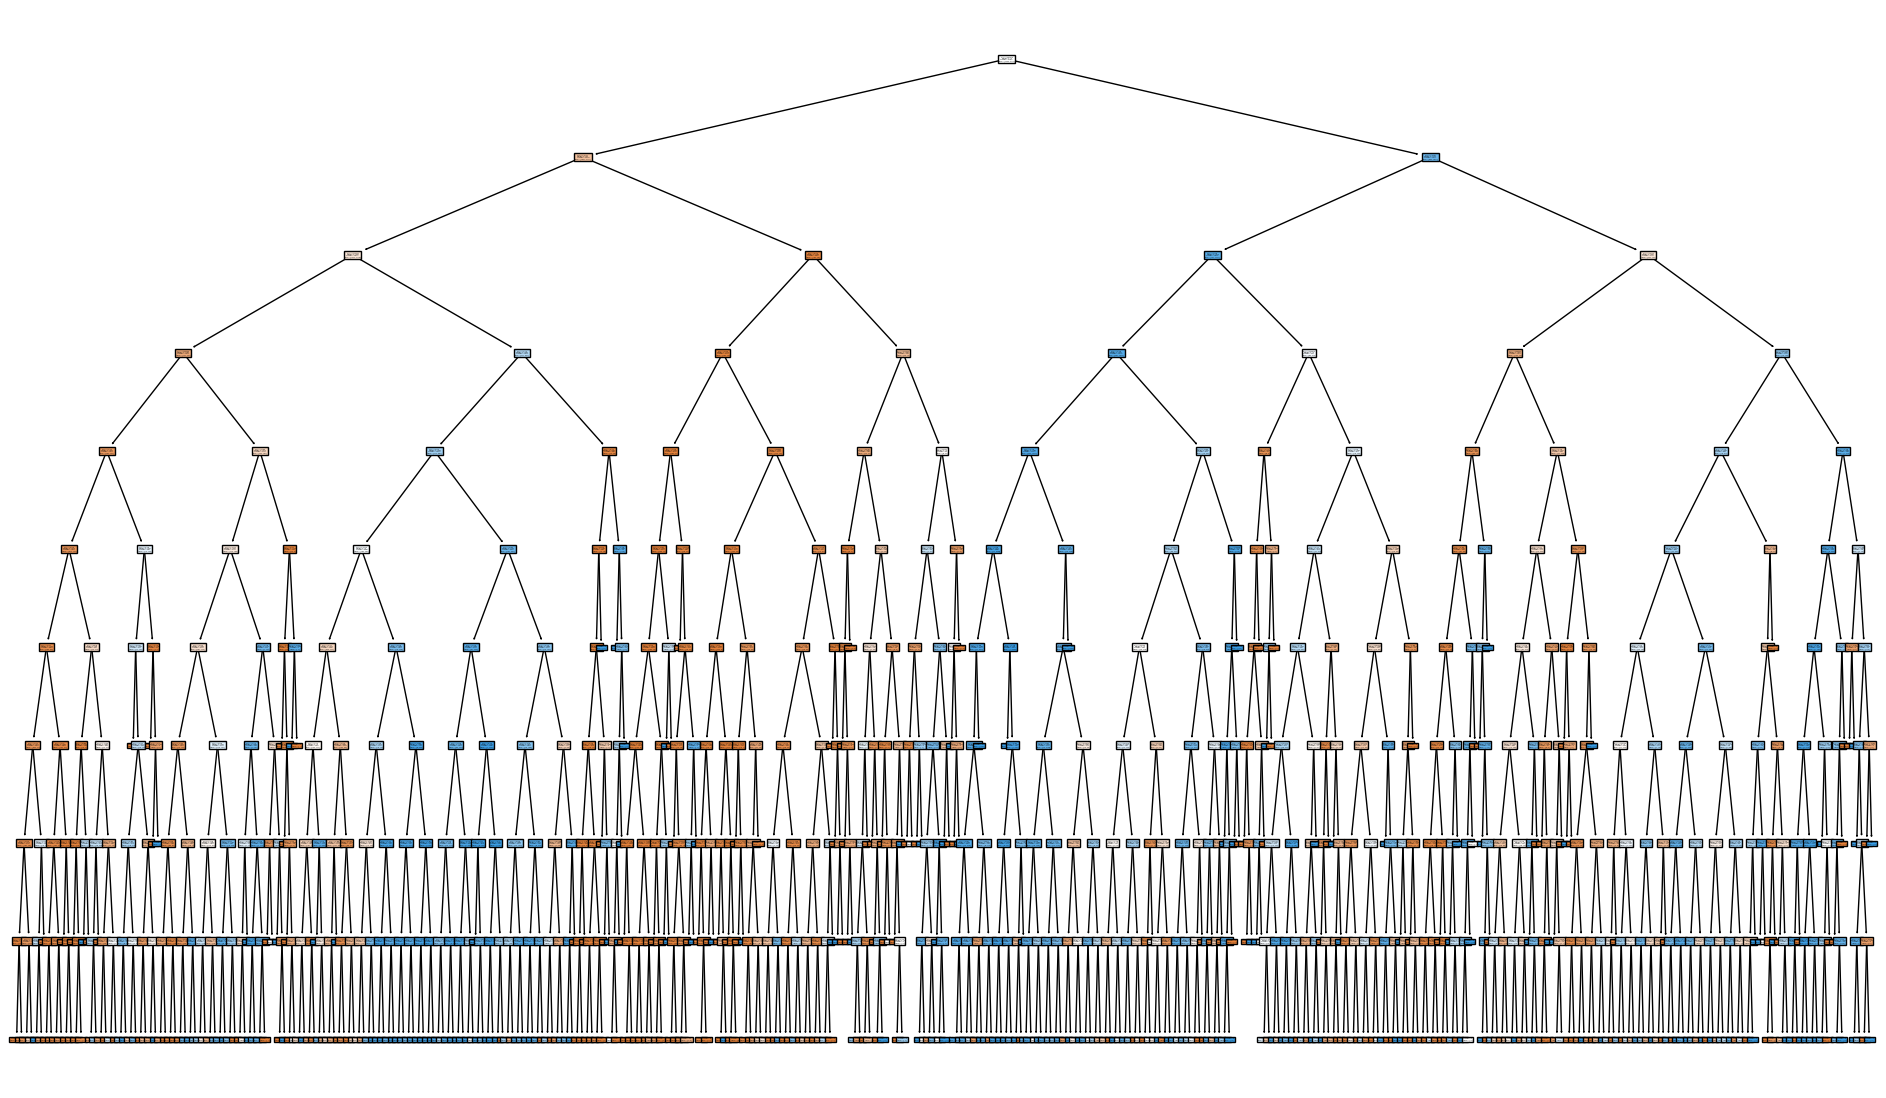

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree

plt.figure(figsize=(24,14))
plot_tree(dt, filled=True)

#### After hyperparameter tuning the testing scores have increased by 2% which is 85% and and recall upto 87%

## Random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=150)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
RandomForestClassifier()

RandomForestClassifier()

In [38]:
y_predict=rf_clf.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,precision_score
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      9171
           1       0.90      0.95      0.93      9098

    accuracy                           0.93     18269
   macro avg       0.93      0.93      0.93     18269
weighted avg       0.93      0.93      0.93     18269



In [40]:
f_Score=f1_score(y_test,y_predict)
f_Score

0.9267405147963824

In [41]:
recall=recall_score(y_test,y_predict)
recall

0.9517476368432622

In [42]:
pre=precision_score(y_test,y_predict)
pre

0.9030138700594431

In [43]:
acc=accuracy_score(y_test,y_predict)
acc

0.9250643166018939

In [44]:
pd.crosstab(y_test,y_predict)

col_0,0,1
y,,
0,8241,930
1,439,8659


In [49]:
y_train_pre=rf_clf.predict(X_train)

In [50]:
accuracy = accuracy_score(y_train,y_train_pre)# model traning accuracy  ... true positive, true negative
accuracy

0.9999817534896451

#### Random Forest can be an ideal model as even without hyperparameter tuning the accuracy and recall scores are 92% and 95% respectively

## Conclusion

The main goal of this project was to be able to predict which customers would subscribe to a term deposit for Bank Of Portugal. The project uses data collected by the Bank of Portugal that includes customers profiles of those who have subscribed to term deposits and the ones who did not subscribe to a term deposit.

The deep explanatory analysis has shown the dataset is a victim of high class imbalance. It also showed that day_of_week doesn’t help much in the prediction.


After the EDA, the dataset was preprocessed by using a one-hot encoder for categorical variables whereas, StandardScaler was used for numerical columns.

Then we created pipelines consisting of 5 classifiers to be compared by the use of f1 score,recall_score,precision_score

Result:Random Forest has the recall with 0.95 or 95%
